## Исследование продаж и популярности компьютерных игр


**Описание проекта:** В индустрии компьютерных игр успех продукта определяется множеством факторов: от платформы и жанра до оценок пользователей и критиков. Данный проект нацелен на выявление закономерностей, определяющих успешность игр, с целью оптимизации ассортимента и планирования рекламных кампаний для интернет-магазина «Стримчик».

**Цель исследования:** Определить основные факторы, влияющие на продажи компьютерных игр в различных регионах, таких как Северная Америка, Европа и Япония, и выявить закономерности, которые помогут оптимизировать и улучшить продажи игр.

**Ход исследования:**

- Подготовка данных: загрузка и анализ исходной информации, включающей данные о продажах, жанрах, платформах, оценках критиков и пользователей, возрастных рейтингах и годах выпуска игр.
- Предобработка данных: корректировка пропусков, дубликатов, приведение столбцов к нужным типам данных, добавление новых столбцов.
- Исследовательский анализ данных: изучение ключевых характеристик игр, их платформ и жанров, анализ распределения продаж, корреляции между оценками и продажами, выявление аномалий.
- Проверка гипотез: сравнение средних оценок пользователей для разных платформ и жанров для выявления значимых различий.

**Описание данных:** Для анализа предоставлены данные о продажах игр в различных регионах (Северная Америка, Европа, Япония и другие страны), оценках пользователей и критиков, жанрах, платформах и годах выпуска игр, а также возрастные рейтинги ESRB.

**Общий вывод:** Проведённый анализ позволит выявить ключевые факторы, влияющие на успех игр, и предложить рекомендации для дальнейшего улучшения ассортимента и рекламных кампаний интернет-магазина «Стримчик».

### Загрузка данных

Для начала работы над проектом загрузим файл и изучим общую информацию о нем:

In [ ]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
#отключаем предупреждения
warnings.filterwarnings('ignore')

In [ ]:
#загрузка данных из файла, вариант для локальной версии и для jupiter
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [ ]:
#знакомимся с данными
data.head(10)

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
#смотрим общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16715 non-null  int64  
 1   Name             16713 non-null  object 
 2   Platform         16715 non-null  object 
 3   Year_of_Release  16446 non-null  float64
 4   Genre            16713 non-null  object 
 5   NA_sales         16715 non-null  float64
 6   EU_sales         16715 non-null  float64
 7   JP_sales         16715 non-null  float64
 8   Other_sales      16715 non-null  float64
 9   Critic_Score     8137 non-null   float64
 10  User_Score       10014 non-null  object 
 11  Rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


Первичное знакомство с датафреймом наличие некорректных названий столбцов, наличие большого количества пропусков и неверные типы данных. Эти проблемы будут решены далее на этапе предобработки.

### Предобработка данных

Перед началом анализа необходимо провести предобработку данных, чтобы убедиться в их корректности и целостности. Этот этап включает работку с пропусками, поиск дубликатов, а также приведение типов данных к нужным форматам. Все эти шаги позволят устранить возможные ошибки в данных и улучшить качество последующего анализа, обеспечив более достоверные результаты.

Для начала посмотрим есть ли в датафрейме дубликаты строк:

In [ ]:
data.duplicated().sum()

0

Далее изменим наименование столбцов для удобства чтения, для этого приведем все к нижнему регистру:

In [ ]:
#изменяем регистр
data.columns = data.columns.str.lower()

После приведения названий к нижнему регистру проверим на наличие дубликатов по комбинации полей name, platform и year_of_release, чтобы удостовериться, что данные об одной игре не повторяются.

In [ ]:
#ищем дубликаты по трем столбцам
data[data[['name', 'platform', 'year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Две строчки с пропусками в наименовании мы рассмотрим чуть позже, а повторяющуются строчку с индексом 16230 удалим из датафрейме.

In [ ]:
#удаляем строчку с повтором
data = data.drop(16230).reset_index(drop=True)

Изменяем тип столбца, содержащий год выхода игры, на datetime

In [ ]:
#приводим к типу datetime
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')

Судя по информации о датафрейме, в столбце user_score у нас должно содержаться число от 0 до 10. Однако тип столбца сейчас - object. Проверим какие значения содержатся в нем:

In [ ]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
0.5       2
0.7       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Краткий ресерч показал, что tbd - to be determined - когда оценка игры еще не была определена. Заменим это значение на пропуски, так как для нашего исследования нам достаточно информации, что рейтинг отсутствует. Заменим tbd на пропуски, приведем весь столбец к числовому формату:

In [ ]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [ ]:
#преобразуем столбец user_score в числовой формат
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [ ]:
#еще раз посмотрим информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16712 non-null  object        
 1   platform         16714 non-null  object        
 2   year_of_release  16445 non-null  datetime64[ns]
 3   genre            16712 non-null  object        
 4   na_sales         16714 non-null  float64       
 5   eu_sales         16714 non-null  float64       
 6   jp_sales         16714 non-null  float64       
 7   other_sales      16714 non-null  float64       
 8   critic_score     8136 non-null   float64       
 9   user_score       7589 non-null   float64       
 10  rating           9948 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


Все типы столбцов теперь указаны правильно, далее переходим к заполнению пропусков:

In [ ]:
#ищем пропуски в каждом столбце
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Посмотрим на строчки с пропусками в name и genre:

In [ ]:
#смотрим строчки с пропусками
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993-01-01,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993-01-01,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Данные строчки будем удалять из датафрейма, так как не имея информации о названии игры, не можем ее анализировать.

Теперь рассмотрим строчки с пропусками в столбце year_of_release:

In [ ]:
#смотрим строчки с пропусками
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaT,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaT,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaT,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaT,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaT,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16372,PDC World Championship Darts 2008,PSP,NaT,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16404,Freaky Flyers,GC,NaT,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16447,Inversion,PC,NaT,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16457,Hakuouki: Shinsengumi Kitan,PS3,NaT,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Год выпуска игр также критически важен для нас, так как не имея информации о точном годе, мы не можем знать относится ли эта игра к актуальному периоду анализа. Однако, хочется отметить, что теоретически для части игр можно было бы осуществить парсинг информации в интернете и записать год выпуска игры самостоятельно. Либо же запросить дополнительную информацию у заказчика.

In [ ]:
#удаляем строчки с пропусками
data = data.dropna(subset=['name', 'year_of_release', 'genre'])

Рассмотрим значения в столбце rating, содержащий пропуски:

In [ ]:
data['rating'].value_counts()

E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Типы рейтингов для понимания как распределяются игры:
- 'E' - Everyone — Для всех
- 'M' - Mature 17+ - Для взрослых
- 'T' - Teen - Подросткам
- 'E10+' - Everyone 10+ - Для всех от 10 лет и старше
- 'K-A' - Kids to Adults - От детей до взрослых (устаревшая версия рейтинга 'E')
- 'AO' - Adults Only - Только для взрослых
- 'EC' - Early childhood — Для детей младшего возраста
- 'RP' - Rating Pending — Рейтинг ожидается

Так как столбец rating является у нас категориальной переменной, то мы можем заменить все пропущенные значения на специально слово 'unknown', которое впоследствии будет означать пропущенное значение для нас.

In [ ]:
data['rating'] = data['rating'].fillna(value='unknown')

Еще раз найдем количество пропусков:

In [ ]:
#смотрим количество пропусков
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Пропуски в столбцах critic_score и user_score составляют почти половину всех значений, поэтому их удаление невозможно без значительной потери данных. Заполнение пропусков медианой или средним значением также не является оптимальным решением, так как это может исказить динамику данных и повлиять на дальнейший анализ. Поэтому было принято решение оставить пропуски, но учитывать их наличие при дальнейшем исследовании, особенно при работе с рейтингами. Также стоит отметить, что для более точного анализа желательно обратиться к заказчику, чтобы выяснить причины такого большого количества пропусков.

Создадим новый столбец, содержащий общее количество продаж игры:

In [ ]:
#добавляем новый столбец
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [ ]:
#смотрим получившийся датафрейм
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


На этапе предобработки данных были проведены несколько ключевых операций. Во-первых, названия столбцов были приведены к нижнему регистру для упрощения работы с ними. Во-вторых, изменены типы данных в двух столбцах, что позволило корректно работать с датами и числовыми значениями. Также были удалены пропуски в некоторых столбцах, где это было необходимо для точности анализа. Эти шаги помогли подготовить данные для дальнейшего исследования.

### Исследовательский анализ

Исследовательский анализ данных помогает выявить ключевые закономерности и тренды в продажах игр на разных платформах и в различных жанрах. В рамках этого этапа мы изучим динамику выпуска игр, проанализируем популярные платформы, их продажи, а также влияние отзывов пользователей и критиков на продажи. Это позволит определить актуальные тренды и сделать выводы, которые помогут в прогнозировании на следующий год.

#### Распределение игр по годам

С помощью сводной таблицы мы проанализируем распределение игр по годам их выпуска и посмотрим, сколько игр выходило в разные годы за весь доступный период. Для наглядности построим линейный график, отображающий это распределение.

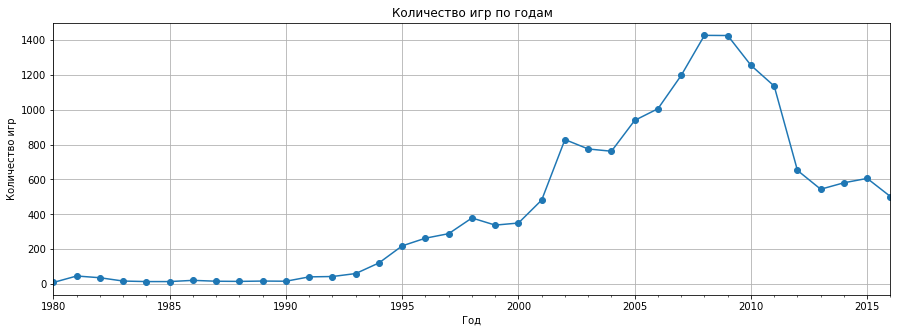

In [ ]:
data.pivot_table(
    index='year_of_release',
    values='name',
    aggfunc='count'
).sort_index().plot(
    kind='line',
    marker='o',
    figsize=(15, 5),
    grid=True,
    legend=False,
    title='Количество игр по годам',
    xlabel='Год',
    ylabel='Количество игр',
)
plt.show()

Из графика видно, что в первые годы развития игровой индустрии количество выпускаемых игр было сравнительно небольшим. Лишь к 1995-2000 годам, с появлением новых платформ и увеличением их разнообразия, рынок игр начал активно расти. Наибольший пик выпуска игр пришёлся на 2007-2008 годы, после чего количество игр начало снижаться. Важно отметить, что данные за 2016 год могут быть неполными и не отражают реальной картины.

Для анализа будет актуально использовать данные за последние 15 лет, так как до этого времени рынок только начинал формироваться, и количество игр было значительно ниже. Период в 15 лет позволит учесть современные тенденции, изменения в популярности платформ и жанров, а также циклы развития игровой индустрии.

#### Продажи топ игр


Найдем топ платформ за все время, с самыми большими продажами:

In [ ]:
top_platform = data.pivot_table(
    index='platform',
    values='total_sales',
    aggfunc='sum'
).sort_values(by='total_sales', ascending=False).head(10)
top_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


В отдельный датафрейм выделим игры только по топовым 6 платформам, потому что данные по ним явно выделяются суммами продаж на фоне остальных игр:

In [ ]:
top_platform = top_platform.head(6)

In [ ]:
data_top = data.query('platform in @top_platform.index')
data_top.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006-01-01,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006-01-01,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [ ]:
platform_sales = data_top.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)
platform_sales

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985-01-01,0.02,NaN,NaN,NaN,NaN,NaN
1994-01-01,NaN,6.03,NaN,NaN,NaN,NaN
1995-01-01,NaN,35.96,NaN,NaN,NaN,NaN
1996-01-01,NaN,94.70,NaN,NaN,NaN,NaN
1997-01-01,NaN,136.17,NaN,NaN,NaN,NaN
1998-01-01,NaN,169.49,NaN,NaN,NaN,NaN
1999-01-01,NaN,144.53,NaN,NaN,NaN,NaN
2000-01-01,NaN,96.37,39.17,NaN,NaN,NaN
2001-01-01,NaN,35.59,166.43,NaN,NaN,NaN


Используя сводную таблицу, мы распределили игры по платформам в зависимости от года их выпуска и просуммировали общие продажи для каждой платформы за каждый год. Это позволит нам увидеть динамику продаж на различных платформах с течением времени. Далее мы построим график, на котором будет наглядно видно, как менялись продажи игр по каждой из топовых платформ в год их выпуска

<Figure size 1008x504 with 0 Axes>

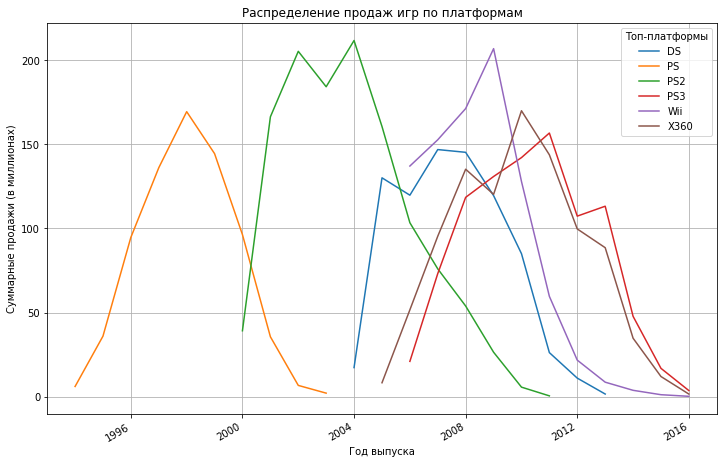

In [ ]:
#построение графика
plt.figure(figsize=(14, 7))
platform_sales.plot(kind='line', grid=True, figsize=(12, 8))

#ограничим показ данных по оси X
plt.xlim('1993-01-01', '2017-01-01')

#настройки графика
plt.title('Распределение продаж игр по платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (в миллионах)')
plt.legend(title='Топ-платформы')
plt.grid(True)
plt.show()

Выборка шести платформ с наибольшими суммарными продажами показала, что каждая из них проходит характерный жизненный цикл, который длится около 10-15 лет. За этот период платформа достигает своего пика, после чего её популярность постепенно снижается.

Платформы, такие как PlayStation и Xbox 360, демонстрируют классический пример этого цикла: их пик продаж приходится на несколько лет после выпуска, после чего начинается спад. PlayStation 2, одна из самых успешных платформ, достигла максимума продаж через несколько лет после выхода, затем её продажи начали падать с появлением PlayStation 3. Аналогично, платформа Wii продемонстрировала быстрый рост с пиком в середине жизненного цикла, но затем потеряла популярность на фоне выхода новых консолей.

#### Определение актуального периода

Для анализа и прогнозов на 2017 год мы решили использовать данные, начиная с 2012 года. Этот период выбран, так как он охватывает последние годы, когда платформы и жанры уже стабилизировались, и можно наблюдать текущие тренды. Данные до 2012 года уже не так актуальны, поскольку многие из тех игр прошли свои пиковые моменты.

Также стоит отметить, что данные за 2016 год являются неполными, так как не все игры того года могли быть учтены. Однако мы включаем их в анализ, чтобы увидеть последние тенденции.

Таким образом, для дальнейшего анализа мы будем использовать данные игр, выпущенных после 2012 года.

In [ ]:
data_actual = data.query('year_of_release > 2012').reset_index(drop=True)
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Рассмотрим информацию о полученным датафрейме:

In [ ]:
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             2233 non-null   object        
 1   platform         2233 non-null   object        
 2   year_of_release  2233 non-null   datetime64[ns]
 3   genre            2233 non-null   object        
 4   na_sales         2233 non-null   float64       
 5   eu_sales         2233 non-null   float64       
 6   jp_sales         2233 non-null   float64       
 7   other_sales      2233 non-null   float64       
 8   critic_score     991 non-null    float64       
 9   user_score       1192 non-null   float64       
 10  rating           2233 non-null   object        
 11  total_sales      2233 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 209.5+ KB


Далее весь анализ мы будем осуществлять уже с новым датафреймом data_actual. Рассмотрим какие уникальные платформы остались у нас в новом датафрейме:

In [ ]:
data_actual['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

#### Отслеживание тенденций и поиск потенциально прибыльных платформ

Для более детального анализа распределения продаж по платформам, мы сгруппируем данные по платформам и году выпуска игр. Это позволит нам увидеть, как менялись продажи каждой платформы на протяжении выбранного актуального периода. Такой подход поможет лучше понять, сколько игр было продано для каждой платформы в конкретный год, а также выявить ключевые тенденции, связанные с жизненным циклом платформ: когда они выходят на рынок, достигают пика популярности и постепенно теряют свою актуальность.

In [ ]:
#агрегируем данные по платформам и годам
platform_sales_actual = data_actual.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
platform_sales_actual.head()

,platform,year_of_release,total_sales
0,3DS,2013-01-01,56.57
1,3DS,2014-01-01,43.76
2,3DS,2015-01-01,27.78
3,3DS,2016-01-01,15.14
4,DS,2013-01-01,1.54


In [ ]:
platform_sales_actual[platform_sales_actual['platform'] == 'N64']

,platform,year_of_release,total_sales


После этого мы построим линейный график для каждой платформы, чтобы визуализировать изменения в продажах по годам. Это даст возможность наглядно увидеть, как быстро появляются новые платформы, когда достигают пиков продаж и когда начинают снижаться по популярности. Такие данные помогут определить, какие платформы имеют потенциал для дальнейшего роста, а какие уже начинают сдавать свои позиции на рынке.

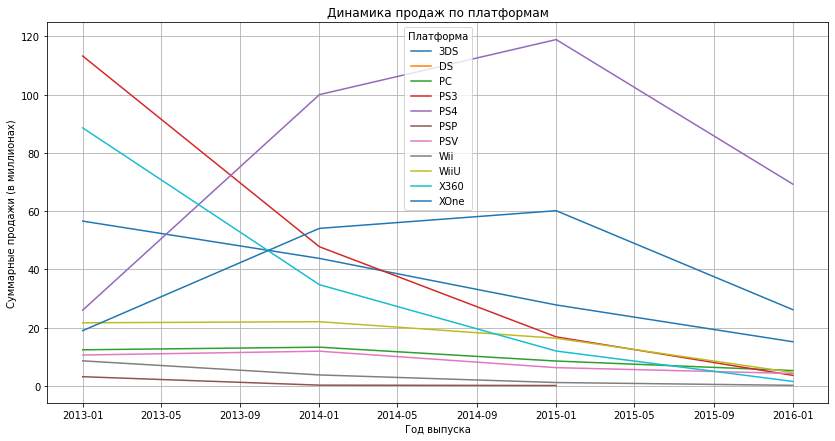

In [ ]:
#строим график
plt.figure(figsize=(14, 7))
for platform in platform_sales_actual['platform'].unique():
    platform_data = platform_sales_actual[platform_sales_actual['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform)

#добавляем заголовки и легенду
plt.title('Динамика продаж по платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (в миллионах)')
plt.legend(title='Платформа')
plt.grid(True)
plt.show()

Что можно увидеть на графике:

- PS3 и Xbox 360 находятся на спаде — они прошли свой жизненный цикл, от пика продаж до постепенного снижения. Это платформы, на которые уже не стоит делать ставку в будущем, так как их популярность будет продолжать снижаться.

- 3DS показывает стабильные продажи, но без сильного роста. Несмотря на это, она по-прежнему остается популярной среди портативных платформ, однако её потенциал для дальнейшего роста ограничен.
- PS4 и Xbox One продолжают расти и набирать популярность, что делает их наиболее перспективными платформами для дальнейших инвестиций.

- Wii, PSP, Wii U, PC и PS Vita демонстрируют горизонтальные линии на графике, что говорит о том, что их продажи остаются на одном уровне без значительного роста или падения. Эти платформы уже не показывают динамику, поэтому они вряд ли будут перспективными для инвестиций.

- Видна динамика продаж для различных поколений консолей одной компании — на примере PlayStation. Мы можем наблюдать конец жизненного цикла PS3, которая уже уступает место новому поколению — PS4, находящейся на этапе роста.


#### Распределение продаж игр

Далее рассмотрим, как различные игры продавались на каждой платформе за весь актуальный период без учета распределения по годам. Для этого построим "ящик с усами" (boxplot) по глобальным продажам игр, разделенным по платформам. Это поможет нам проанализировать медианные значения продаж, выявить разброс данных и обнаружить выбросы — игры с аномально высокими продажами. Такой анализ даст представление о том, как распределялись продажи внутри каждой платформы и какие платформы имеют наиболее стабильные или, наоборот, нестабильные результаты.

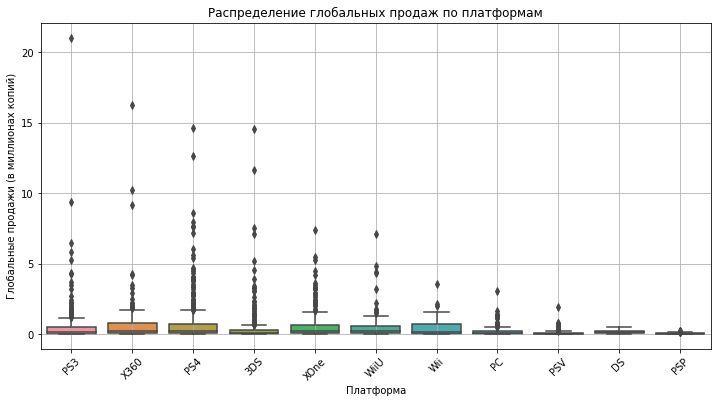

In [ ]:
#строим boxplot для глобальных продаж игр в разбивке по платформам
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=data_actual)

#добавляем заголовки
plt.title('Распределение глобальных продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (в миллионах копий)')

plt.xticks(rotation=45) #для удобства чтения меток
plt.grid(True)
plt.show()

График в исходном виде оказался плохочитабельным — сложно определить медианные значения для платформ, так как у некоторых из них присутствуют значительные выбросы с очень высокими продажами. Эти выбросы искажают общее восприятие данных, затрудняя анализ. Посмотрим подробнее какие это игры:

In [ ]:
data_actual.query('total_sales > 8')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
5,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014-01-01,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
6,Call of Duty: Ghosts,X360,2013-01-01,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
7,Call of Duty: Ghosts,PS3,2013-01-01,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
8,Minecraft,X360,2013-01-01,Misc,5.70,2.65,0.02,0.81,NaN,NaN,unknown,9.18
9,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


Обычно при анализе данных выбросы, которые сильно отличаются от межквартильного размаха, рекомендуют удалять, чтобы они не искажали результаты. Однако в данном случае, поскольку наша цель — проанализировать популярность платформ и построить прогноз для будущих игр, стремящихся к такому же успеху, удаление этих выбросов было бы некорректным. Высокие продажи — это ключевой показатель, на который мы ориентируемся, и их исключение может исказить важную информацию о платформе.

Для более наглядного анализа медиан и общего распределения продаж мы построим повторный «ящик с усами», ограничив максимальное значение продаж до 2 миллионов. Это позволит лучше оценить общие тенденции без влияния крупных выбросов.

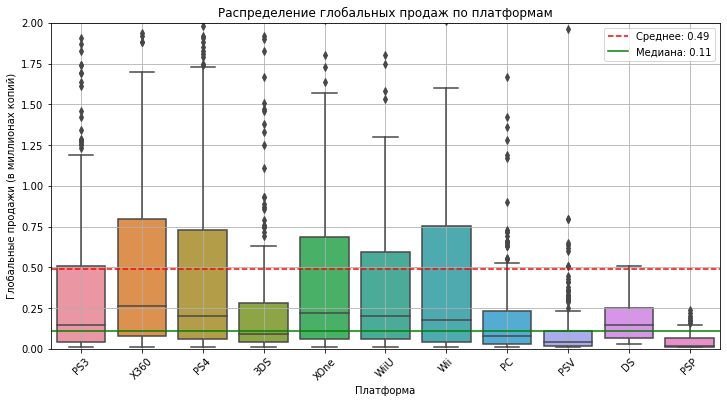

In [ ]:
# Строим boxplot для глобальных продаж игр в разбивке по платформам
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=data_actual)

plt.ylim(0,2)
# Добавляем заголовки
plt.title('Распределение глобальных продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (в миллионах копий)')
mean_sales = data_actual["total_sales"].mean()
median_sales = data_actual["total_sales"].median()
plt.axhline(mean_sales, color="r", linestyle="--", label=f"Среднее: {mean_sales:.2f}")
plt.axhline(
    median_sales, color="g", linestyle="-", label=f"Медиана: {median_sales:.2f}"
)
plt.xticks(rotation=45) #для удобства чтения меток
plt.legend()
plt.grid(True)
plt.show()

Первая диаграмма демонстрирует глобальные продажи по платформам, с максимальными значениями выбросов, особенно для платформ PS3, X360, PS4 и 3DS. Видно, что эти платформы имеют значительно высокие продажи отдельных игр, что также создает большие разбросы данных. Например, выбросы могут достигать более 10 миллионов копий для некоторых платформ.

Среднее значение продаж игр на всех платформах составляет около 0.49 миллиона копий, тогда как медиана — около 0.11 миллиона копий. Это свидетельствует о том, что большая часть игр продается в пределах от 0 до 1 миллиона копий, и лишь немногие проекты достигают высоких продаж.

На второй диаграмме с масштабированием до 2 миллионов копий мы видим более детализированное распределение продаж. Платформы PS4, XOne и WiiU демонстрируют более высокие медианные значения по сравнению с другими платформами, что делает их потенциально прибыльными на данный момент.

PS4 и XOne выделяются как наиболее перспективные платформы для дальнейших вложений, так как их средние и медианные значения продаж заметно выше, чем у других.

#### Зависимость продаж от отзывов

В этом разделе мы исследуем, как пользовательские и критические отзывы влияют на продажи игр внутри одной популярной платформы. Для анализа выберем самую популярную платформу по продажам:

In [ ]:
data_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
Name: total_sales, dtype: float64

Для самой популярной платформы PS4 создадим отдельный датафрейм только с ее играми:

In [ ]:
data_top1= data_actual.query('platform == "PS4"')
data_top1.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
4,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
9,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
10,Star Wars Battlefront (2015),PS4,2015-01-01,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
11,Call of Duty: Advanced Warfare,PS4,2014-01-01,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


Построим диаграммы рассеяния, чтобы наглядно увидеть зависимость между оценками и продажами и также рассчитаем коэффициент корреляции, чтобы количественно оценить силу связи между отзывами и продажами.

Сначала найдем зависимость продаж от пользовательйской оценки user_score:

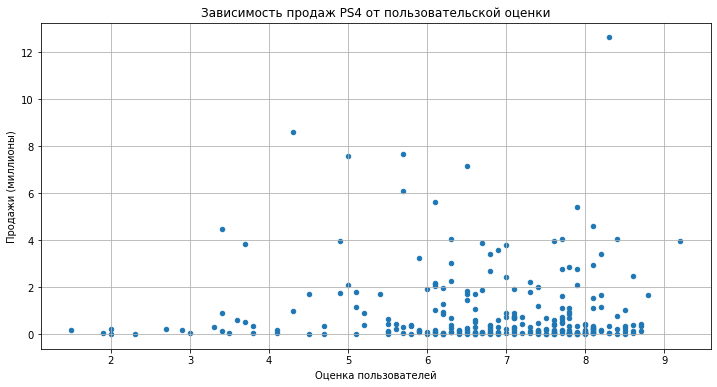

In [ ]:
data_top1.plot(
    kind='scatter',
    x='user_score',
    y='total_sales',
    figsize=(12, 6),
    grid=True,
    legend=False
)
plt.title('Зависимость продаж PS4 от пользовательской оценки')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи (миллионы)')
plt.show()

In [ ]:
data_top1['total_sales'].corr(data_top1['user_score'])

-0.031957110204556376

Далее аналогичным образом рассчитаем зависимость от оценки критиков critic_score:

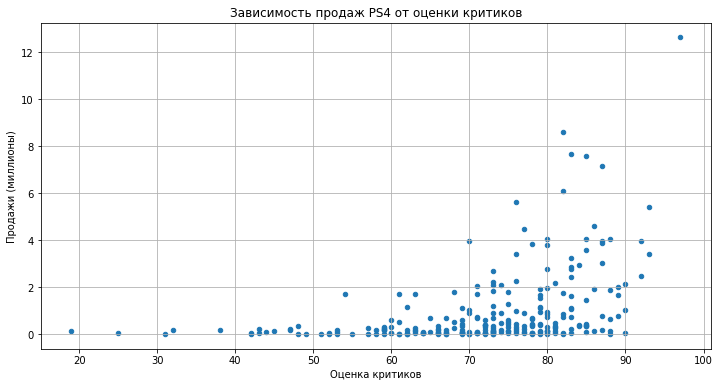

In [ ]:
data_top1.plot(
    kind='scatter',
    x='critic_score',
    y='total_sales',
    figsize=(12, 6),
    grid=True,
    legend=False
)
plt.title('Зависимость продаж PS4 от оценки критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи (миллионы)')
plt.show()

In [ ]:
data_top1['total_sales'].corr(data_top1['critic_score'])

0.406567902061781

На основе диаграмм рассеяния и рассчитанных значений корреляции для платформы PS4 можно сделать следующие выводы:

- Влияние оценки пользователей: Корреляция между оценкой пользователей и продажами составила -0.03, что указывает на практически полное отсутствие зависимости. Это означает, что пользовательские оценки практически не влияют на уровень продаж игр.

- Влияние оценки критиков: Корреляция между оценкой критиков и продажами составила 0.39, что указывает на умеренную положительную зависимость. Игры с высокими оценками критиков чаще имеют лучшие продажи, но данная зависимость не является решающей.

Таким образом, хотя оценки критиков играют некоторую роль в формировании успешных продаж игр, пользовательские отзывы для платформы PS4 почти не оказывают влияния на продажи.

Рассмотрим применяется ли данная логика для всех платформ. Для этого построим диаграммы рассеяния для определения зависимости для остальных платформ в топ 5 популярных.

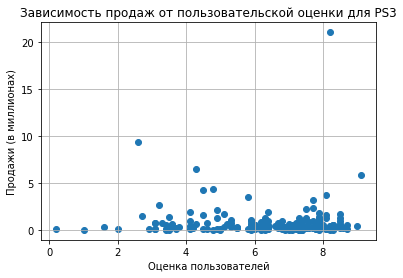

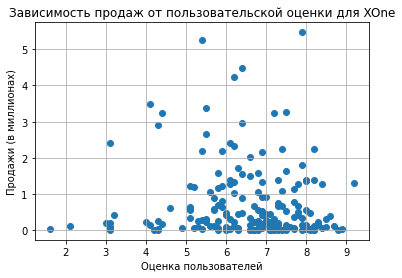

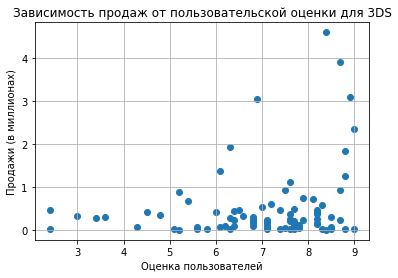

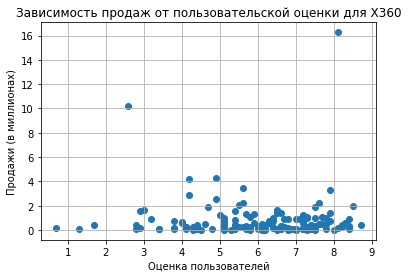

In [ ]:
#список платформ
platforms = ['PS3', 'XOne', '3DS', 'X360']

#цикл для построения диаграмм
for platform in platforms:
    platform_data = data_actual[data_actual['platform'] == platform]  #фильтруем данные по платформе
    plt.scatter(platform_data['user_score'], platform_data['total_sales'])
    plt.title(f'Зависимость продаж от пользовательской оценки для {platform}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи (в миллионах)')
    plt.grid(True)
    plt.show()

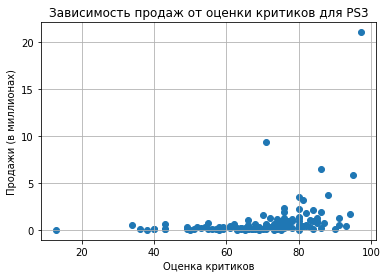

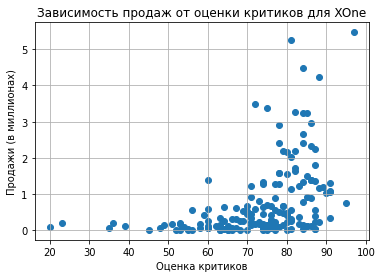

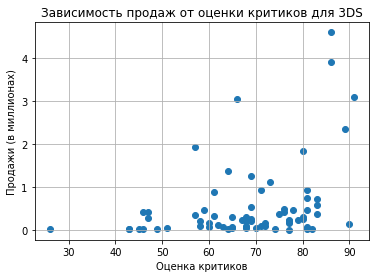

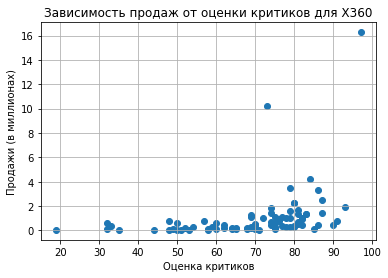

In [ ]:
#список платформ
platforms = ['PS3', 'XOne', '3DS', 'X360']

#цикл для построения диаграмм
for platform in platforms:
    platform_data = data_actual[data_actual['platform'] == platform]  #фильтруем данные по платформе
    plt.scatter(platform_data['critic_score'], platform_data['total_sales'])
    plt.title(f'Зависимость продаж от оценки критиков для {platform}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи (в миллионах)')
    plt.grid(True)
    plt.show()


Также для каждой платформы дополнительно рассчитаем коэффициент корреляции:

In [ ]:
platforms = ['PS3', 'XOne', '3DS', 'X360']

for platform in platforms:
    platform_data = data_actual[data_actual['platform'] == platform]
    user_corr = platform_data['total_sales'].corr(platform_data['user_score'])
    critic_corr = platform_data['total_sales'].corr(platform_data['critic_score'])

    print(f"Платформа: {platform}")
    print(f"Корреляция с оценкой пользователей: {user_corr:.2f}")
    print(f"Корреляция с оценкой критиков: {critic_corr:.2f}")
    print()

Платформа: PS3
Корреляция с оценкой пользователей: 0.00
Корреляция с оценкой критиков: 0.33

Платформа: XOne
Корреляция с оценкой пользователей: -0.07
Корреляция с оценкой критиков: 0.42

Платформа: 3DS
Корреляция с оценкой пользователей: 0.24
Корреляция с оценкой критиков: 0.36

Платформа: X360
Корреляция с оценкой пользователей: -0.01
Корреляция с оценкой критиков: 0.35



На основе новых данных можно сделать вывод, что на всех платформах отзывы критиков оказывают более сильное влияние на продажи, чем отзывы пользователей. Корреляция с оценками пользователей либо очень слабая, либо даже отрицательная, что указывает на незначительное влияние этого фактора. В то же время, положительная корреляция с оценками критиков присутствует на всех платформах, но она также не является высокой, что подтверждает вывод о том, что на продажи влияют и другие факторы.

#### Распределение игр по жанрам

Жанр игры — это одна из ключевых характеристик, которая напрямую влияет на восприятие, популярность и успешность игры на рынке. Каждый жанр привлекает определённую аудиторию с особыми ожиданиями, что отражается на объёмах продаж и стратегии продвижения. Чтобы лучше понять тенденции, начнем с анализа распределения игр по жанрам за актуальный период:

In [ ]:
data_actual.pivot_table(
    index='genre',
    values='name',
    aggfunc='count'
).sort_values(by='name', ascending=False)

,name
genre,
Action,766
Role-Playing,292
Adventure,245
Sports,214
Shooter,187
Misc,155
Racing,85
Fighting,80
Platform,74


Теперь посмотрим как в тот же актуальный период распределились глобальные продажи игр в зависимости от жанров:

In [ ]:
data_actual.pivot_table(
    index='genre',
    values='total_sales',
    aggfunc='median'
).sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


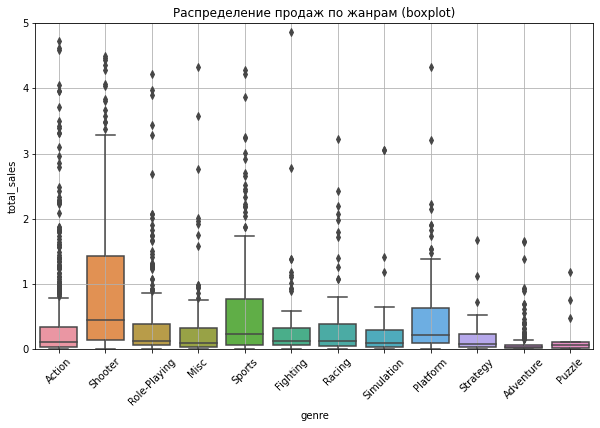

In [ ]:
# Построим boxplot для жанров
plt.figure(figsize=(10, 6))
plt.ylim(0,5)
sns.boxplot(data=data_actual, x='genre', y='total_sales')
plt.title('Распределение продаж по жанрам (boxplot)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Выводы:**

1) Жанры с высокими продажами: Shooter и Sports выделяются на фоне других жанров как по медианным, так и по суммарным продажам. Это говорит о том, что в этих жанрах есть как отдельные игры-блокбастеры, так и стабильные продажи в среднем. Platform также показывает хорошие показатели, занимая третье место по медианным продажам, что свидетельствует о его стабильной популярности.

2) Жанры со средними продажами: Role-Playing, Fighting, Racing демонстрируют медианные продажи на уровне около 0.12-0.13 миллионов копий. Это значит, что эти жанры не так сильно выделяются среди топов, но также могут приносить доход.

3) Жанры с низкими продажами: Action, Simulation, Misc, Strategy, Puzzle, и Adventure показывают наиболее низкие медианные значения продаж. Несмотря на большое количество выпущенных игр, продажи в этих жанрах в среднем ниже, что может говорить о более высоком уровне конкуренции или меньшей привлекательности для аудитории.

Таким образом, жанры Shooter, Sports, и Platform выглядят наиболее прибыльными с точки зрения стабильных продаж, в то время как такие жанры как Puzzle и Adventure характеризуются наименьшими продажами.

### Составление портретов пользователей

Согласно нашему датафрейму, пользователи интернет-магазина «Стримчик» делятся на несколько категорий по регионам, среди которых основными являются Северная Америка, Европа и Япония. Также имеются данные по продажам в других странах, однако акцент анализа будет сделан на трёх ключевых регионах. Продажи игр могут значительно различаться в зависимости от региона, и наша задача — выяснить, какие платформы и жанры игр популярны в каждом регионе, а также как на них влияет рейтинг ESRB. Для анализа будут использованы функции, которые помогут выявить топ платформ, жанров и оценить влияние рейтингов на продажи.

In [ ]:
def get_top_platform(data, region_sales):
    """
    Функция для получения топ-платформ
    по заданному региону продаж и их доли в общей сумме продаж.
    """
    total_sales = data[region_sales].sum()
    top_platform = data.pivot_table(
        index='platform',
        values=region_sales,
        aggfunc='sum'
    ).sort_values(by=region_sales, ascending=False).head()
    top_platform['share'] = top_platform[region_sales] / total_sales
    return top_platform

In [ ]:
def get_top_genres(data, region_sales):
    """
    Функция для получения топ-жанров
    по заданному региону продаж.
    """
    top_genres = data.pivot_table(
        index='genre',
        values=region_sales,
        aggfunc='sum'
    ).sort_values(by=region_sales, ascending=False).head()
    return top_genres

In [ ]:
def get_rating_sales(data, region_sales):
    """
    Функция для расчета суммы продаж по каждому рейтингу
    """
    rating_sales = data.pivot_table(
        index='rating',
        values=region_sales,
        aggfunc='sum'
    ).sort_values(by=region_sales, ascending=False)
    rating_sales['share'] = rating_sales[region_sales] / rating_sales[region_sales].sum()
    return rating_sales

#### Портрет пользователей Северной Америки (NA)

Рассмотрим подробнее показатели для пользователей региона Северной Америки:

In [ ]:
platform_na_sales = get_top_platform(data_actual, 'na_sales')
platform_na_sales

,na_sales,share
platform,,
PS4,108.74,0.248429
XOne,93.12,0.212744
X360,81.66,0.186562
PS3,63.50,0.145073
3DS,38.20,0.087272


In [ ]:
genres_na_sales = get_top_genres(data_actual, 'na_sales')
genres_na_sales

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


In [ ]:
na_rating_sales = get_rating_sales(data_actual, 'na_sales')
na_rating_sales

,na_sales,share
rating,,
M,165.21,0.377442
unknown,89.42,0.204291
E,79.05,0.180599
E10+,54.24,0.123918
T,49.79,0.113751


Среди пользователей Северной Америки наибольшей популярностью пользуются платформы PS4 и XOne, которые доминируют по продажам. Платформы X360 и PS3 также занимают значительную долю рынка, хотя и находятся на стадии спада. Жанры экшен, шутеры и спортивные игры остаются наиболее востребованными, благодаря динамичному и увлекательному геймплею. В рейтинге по возрастным категориям лидируют игры с рейтингом 'M' (Mature — для взрослых), однако значительная доля продаж приходится на игры с неопределённым рейтингом "unknown". Игры с рейтингом 'E' для всех возрастов также популярны, отражая спрос на семейные и доступные для всех возрастов проекты.

#### Портрет пользователей Европы (EU)

In [ ]:
platform_eu_sales = get_top_platform(data_actual, 'eu_sales')
platform_eu_sales

,eu_sales,share
platform,,
PS4,141.09,0.359712
PS3,67.81,0.172883
XOne,51.59,0.131530
X360,42.52,0.108406
3DS,30.96,0.078933


In [ ]:
genres_eu_sales = get_top_genres(data_actual, 'eu_sales')
genres_eu_sales

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [ ]:
eu_rating_sales = get_rating_sales(data_actual, 'eu_sales')
eu_rating_sales

,eu_sales,share
rating,,
M,145.32,0.370497
E,83.36,0.212528
unknown,78.91,0.201183
E10+,42.69,0.108839
T,41.95,0.106953



В Европе платформы PS4 и PS3 доминируют по продажам, особенно PS4, которая занимает 36% от всех продаж. Xbox One и Xbox 360 занимают третье и четвертое места соответственно, но значительно уступают PlayStation по популярности. Среди жанров наибольшие продажи имеют экшен-игры, шутеры и спортивные игры. По рейтингам наиболее продаваемыми являются игры с рейтингом «M» (для взрослых), которые занимают почти 37% от всех продаж. Игры с рейтингом «E» (для всех возрастов) также занимают значительную долю — 21%.

Европейская аудитория явно отдает предпочтение экшен-играм и шутерам, которые составляют основу наиболее популярных жанров. Лидерство PlayStation в Европе очевидно, так как PS4 и PS3 составляют значительную долю рынка.

#### Потрет пользователей Японии (JP)

In [ ]:
platform_jp_sales = get_top_platform(data_actual, 'jp_sales')
platform_jp_sales

,jp_sales,share
platform,,
3DS,67.81,0.481674
PS3,23.35,0.165862
PSV,18.59,0.132050
PS4,15.96,0.113368
WiiU,10.88,0.077284


In [ ]:
genres_jp_sales = get_top_genres(data_actual, 'jp_sales')
genres_jp_sales

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


In [ ]:
jp_rating_sales = get_rating_sales(data_actual, 'jp_sales')
jp_rating_sales

,jp_sales,share
rating,,
unknown,85.05,0.604134
T,20.59,0.146257
E,15.14,0.107544
M,14.11,0.100227
E10+,5.89,0.041838


На японском рынке явным лидером является платформа 3DS, которая занимает почти половину всех продаж. Следом идут PS3, PSV и PS4, но с гораздо меньшими долями. Это подтверждает высокий спрос на портативные устройства, особенно на консоли от Nintendo. Среди жанров явное доминирование наблюдается у ролевых игр (Role-Playing), которые значительно опережают экшен и другие жанры. По рейтингу лидируют игры с неизвестным рейтингом, что может быть связано с локальными особенностями классификации игр в Японии. Среди известных категорий впереди идут игры для подростков и для всех.

Таким образом, японский рынок сильно отличается от западных. Портативные устройства и жанр ролевых игр доминируют среди японских пользователей, а предпочтения по рейтингам ESRB менее выражены, возможно, из-за разных методов сертификации игр в регионе.

### Проверка гипотез

#### Сравнение средних рейтингов платформ Xbox One и PC

Проведем исследование, чтобы выяснить, отличаются ли средние пользовательские рейтинги платформ Xbox One (XOne) и PC. Это поможет определить, существует ли статистически значимое различие в восприятии игр пользователями на разных платформах. Для начала, выделим данные по этим платформам в отдельные таблицы для дальнейшего анализа.

In [ ]:
xbox_user_score = data_actual.query('platform == "XOne"')['user_score']
xbox_user_score

14      NaN
22      7.9
24      5.4
31      6.4
39      6.2
       ... 
2204    8.2
2208    6.6
2210    NaN
2215    6.7
2219    NaN
Name: user_score, Length: 247, dtype: float64

In [ ]:
pc_user_score = data_actual.query('platform == "PC"')['user_score']
pc_user_score

73      3.9
157     7.9
184     2.2
196     6.0
208     5.4
       ... 
2168    7.9
2171    1.4
2201    NaN
2205    NaN
2226    7.6
Name: user_score, Length: 189, dtype: float64

Посмотрим какое количество пропусков содержится в данных массивах:

In [ ]:
#находим количество пропусков
xbox_user_score.isna().sum()

65

In [ ]:
#находим количество пропусков
pc_user_score.isna().sum()

34

Количество пропусков составляет большой процент, но для проверки гипотез важны полные данные и отсутствие значений может исказить результаты анализа. Принимаем решение удалить пропуски, но при выводах будем учитывать данный момент.

In [ ]:
#убираем пропуски
xbox_user_score = xbox_user_score.dropna()
pc_user_score = pc_user_score.dropna()

Сформируем гипотезы для сравнения средних пользовательскизх рейтингов платформ. Для этого в качестве нулевой гипотезы возьмем факт, что они равны между собой, также как и говорится в бизнес гипотезе. Альтернативной гипотезой будет обратное утверждение, что средние значения отличаются.

**Нулевая гипотеза (H0):**  Средний пользовательский рейтинг платформы XOne равен среднему пользовательскому рейтингу платформы PC.

**Альтернативная гипотеза (H1):**
Средний пользовательский рейтинг платформы XOne не равен среднему пользовательскому рейтингу платформы PC.

Для проверки гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC, мы используем T-тест для независимых выборок. Этот тест подходит, потому что у нас есть две группы данных (рейтинги пользователей для Xbox One и PC), и мы проверяем, различаются ли их средние значения.

Перед проведением теста убедимся, что дисперсии двух выборок не сильно отличаются

In [ ]:
#находим значение дисперсии
xbox_var = xbox_user_score.var()
pc_var = pc_user_score.var()

print(f"Дисперсия для Xbox One: {xbox_var:.2f}")
print(f"Дисперсия для PC: {pc_var:.2f}")

Дисперсия для Xbox One: 1.91
Дисперсия для PC: 3.04


Для проверки гипотез будем использовать уровень статистической значимости = 0.05

In [ ]:
#выполнение t-теста для сравнения средних значений двух независимых групп
t_stat, p_value = st.ttest_ind(xbox_user_score, pc_user_score)

alpha = 0.05
print('p-value', p_value)

#сравниваем параметры
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

print(f"Средний рейтинг платформы XOne: {np.mean(xbox_user_score):.2f}")
print(f"Средний рейтинг платформы PC: {np.mean(pc_user_score):.2f}")

p-value 0.14012658403611647
Не отвергаем нулевую гипотезу
Средний рейтинг платформы XOne: 6.52
Средний рейтинг платформы PC: 6.27


На основе результатов t-теста (p-value ≈ 0.14) мы не отвергаем нулевую гипотезу. Это означает, что нет статистически значимых различий между средними пользовательскими рейтингами платформ Xbox One и PC.

Средний рейтинг игр на платформе Xbox One составляет 6.52, в то время как на PC — 6.27. Разница в средних значениях рейтингов не является достаточно большой для того, чтобы быть признанной статистически значимой.

Таким образом, первоначальная гипотеза, о том что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, не была отвергнута и может быть верна.

#### Сравнение средний рейтингов пользователей жанров Action и Sports

Проведем исследование, чтобы выяснить, различаются ли средние пользовательские рейтинги жанров Action и Sports. Это поможет понять, как пользователи оценивают игры разных жанров и есть ли статистически значимое различие в их предпочтениях. Для начала, выделим данные по этим жанрам в отдельные таблицы для дальнейшего анализа:

In [ ]:
action_user_score = data_actual.query('genre == "Action"')['user_score']
action_user_score

0       8.2
1       8.1
4       8.3
20      9.1
22      7.9
       ... 
2222    NaN
2225    NaN
2226    7.6
2227    NaN
2230    NaN
Name: user_score, Length: 766, dtype: float64

In [ ]:
sports_user_score = data_actual.query('genre == "Sports"')['user_score']
sports_user_score

9       4.3
12      5.0
18      4.3
19      5.7
38      4.5
       ... 
2144    NaN
2147    4.5
2171    1.4
2207    NaN
2208    6.6
Name: user_score, Length: 214, dtype: float64

Найдем общее количество пропусков в полученных массивах:

In [ ]:
#находим количество пропусков
action_user_score.isna().sum()

377

In [ ]:
#находим количество пропусков
sports_user_score.isna().sum()

54

Для корректной проверки гипотезы нам нужно избавиться от пропусков в данных, несмотря на факт, что они занимают большой процент от общего количества.

In [ ]:
#удаляем пропуски
action_user_score = action_user_score.dropna()
sports_user_score = sports_user_score.dropna()

Изначальная бизнес-гипотеза утверждает, что средние пользовательские рейтинги жанров отличаются. Для того чобы проверить этот факт в качестве нулевой гипотезы предположим, что рейтинги равны. Альтернативной гипотезой же будет обратное - средние рейтинги разнятся

**Нулевая гипотеза (H0):** Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.

**Альтернативная гипотеза (H1):** Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

Будем использовать двухвыборочный t-тест для проверки гипотезы, поскольку необходимо сравнить средние значения двух независимых групп — жанров Action и Sports. T-тест помогает определить, есть ли статистически значимое различие между этими средними значениями. Этот тест применим, когда данные распределены нормально, а выборки независимы друг от друга, как в нашем случае.

Для проверки гипотез будем использовать уровень статистической значимости = 0.05

Перед проведение теста проверим значения дисперсий и убедимся, что они не значительно отличаются

In [ ]:
action_var = action_user_score.var()
sports_var = sports_user_score.var()

print(f"Дисперсия для Action: {action_var:.2f}")
print(f"Дисперсия для Sports: {sports_var:.2f}")

Дисперсия для Action: 1.77
Дисперсия для Sports: 3.18


In [ ]:
#выполнение t-теста для сравнения средних значений двух независимых групп
t_stat, p_value = st.ttest_ind(action_user_score, sports_user_score)

alpha = 0.05
print('p-value', p_value)

#сравниваем параметры
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

print(f'Средний рейтинг жанра Action: {np.mean(action_user_score):.2f}')
print(f'Средний рейтинг жанра Sports: {np.mean(sports_user_score):.2f}')

p-value 1.0517832389140023e-27
Отвергаем нулевую гипотезу
Средний рейтинг жанра Action: 6.84
Средний рейтинг жанра Sports: 5.24


На основе результатов t-теста (p-value ≈ 1.05e-27) мы отвергаем нулевую гипотезу. Это означает, что средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются.

Средний рейтинг игр жанра Action составляет 6.84, а для жанра Sports — 5.24. Разница в средних значениях рейтингов достаточно большая, и низкое p-value подтверждает статистическую значимость этого различия.

Таким образом, можно утверждать, что первоначальная бизнес-гипотеза верна — средние пользовательские рейтинги жанров Action и Sports действительно разные.

### Общий вывод

Вывод:

В этом проекте мы провели исследование данных об играх с целью выявления ключевых факторов, влияющих на их продажи. Мы проанализировали платформы, жанры, влияние оценок пользователей и критиков, а также проверили несколько гипотез.

1) Предобработка данных:

В рамках предобработки данных были исправлены названия столбцов, приведены типы данных в соответствие с задачей, а также обработаны пропуски. Пропуски в столбце рейтинга игр были заменены на "unknown", а пропуски в пользовательских и критических оценках остались, так как их было слишком много для удаления или корректного заполнения.

2) Анализ по годам и выбор актуального периода:

Из-за того, что ранние данные о продажах игр были ограниченными, мы выбрали актуальный период с 2012 года. Это позволило сосредоточиться на современных тенденциях и анализировать данные, которые имеют наибольшую актуальность для прогноза будущих продаж и оценки текущего состояния рынка.

3) Результаты анализа платформ:

Платформы имеют свой жизненный цикл, который обычно длится около 10–15 лет. На данный момент наиболее перспективными платформами являются PS4 и Xbox One, которые продолжают набирать популярность. В то же время более старые поколения консолей, такие как PS3 и X360, находятся на стадии спада. Nintendo 3DS также остаётся популярной в некоторых регионах, особенно в Японии.

4) Результаты анализа жанров:

Анализ жанров показал, что Shooter и Sports — это самые прибыльные жанры с высокими медианными продажами. Жанр Platform также показывает хорошие результаты, занимая третье место по медианным продажам, что говорит о его стабильной популярности.

5) Проверка гипотез:

Мы проверили две ключевые бизнес-гипотезы, которые касались пользовательских рейтингов на разных платформах и в разных жанрах.

Первая гипотеза заключалась в том, что средние пользовательские рейтинги на платформах Xbox One и PC одинаковы. Результаты t-теста показали, что мы не отвергаем нулевую гипотезу, то есть средние рейтинги этих платформ не отличаются статистически значимо. Это означает, что различия в пользовательских оценках между Xbox One и PC несущественны.

Вторая гипотеза предполагала, что средние пользовательские рейтинги жанров Action и Sports различаются. Проведённый t-тест подтвердил эту гипотезу — рейтинги жанров действительно статистически значимо различаются, что указывает на различия в восприятии игр в зависимости от жанра. Хотя разница в абсолютных числах может быть незначительной, статистический анализ показал, что эти различия имеют значение.

6) Рекомендации:

На основании анализа рекомендуется сосредоточить внимание на разработке игр для платформ PS4 и Xbox One, которые продолжают расти. Жанры Shooter, Sports и Platform остаются наиболее прибыльными и популярными, поэтому стоит инвестировать в их разработку. Также стоит учитывать важность оценок критиков, так как они оказывают влияние на успешность игр, и ориентироваться на них при планировании маркетинговых стратегий.

